#📌 Extracción

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [4]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [5]:
customer_df = pd.json_normalize(df['customer'])
df = df.join(customer_df)

In [6]:
phone_df = pd.json_normalize(df['phone'])
df = df.join(phone_df, rsuffix='_phone')

In [7]:
internet_df = pd.json_normalize(df['internet'])
df = df.join(internet_df, rsuffix='_internet')

In [8]:
account_df = pd.json_normalize(df['account'])
df = df.join(account_df, rsuffix='_account')

In [9]:
df.drop(['customerID','customer', 'phone','internet', 'account'], axis=1, inplace=True)

In [10]:
df['Charges.Total'] = df['Charges.Total'].replace(' ', np.nan)
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'])

In [11]:
# 1 para 'Yes', 0 para 'No'
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0}).fillna(-1).astype(int)

In [12]:
df['PaymentMethod'] = df['PaymentMethod'].astype(str).str.lower()
df['Contract'] = df['Contract'].astype(str).str.lower()
df['InternetService'] = df['InternetService'].astype(str).str.lower()

In [13]:
df['Contract'] = df['Contract'].str.replace('-', ' ')

In [14]:
df['Daily_Cost'] = (df['Charges.Monthly'] / 30).round(2)

In [15]:
df['DeviceProtection'] = df['DeviceProtection'].str.replace(' internet service', ' ')
df['TechSupport'] = df['TechSupport'].str.replace(' internet service', ' ')
df['StreamingTV'] = df['StreamingTV'].str.replace(' internet service', ' ')
df['StreamingMovies'] = df['StreamingMovies'].str.replace(' internet service', ' ')
df['OnlineSecurity'] = df['OnlineSecurity'].str.replace(' internet service', ' ')

In [16]:
df.rename(columns={'SeniorCitizen': 'Senior', 'InternetService': 'Internet', 'PaperlessBilling': 'e-Billing'}, inplace=True)

In [17]:
MultipleLines_counts = df['MultipleLines'].value_counts()
MultipleLines_counts

,count
MultipleLines,
No,3495
Yes,3065
No phone service,707


In [18]:
df.sample(1)

,Churn,gender,Senior,Partner,Dependents,tenure,PhoneService,MultipleLines,Internet,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,e-Billing,PaymentMethod,Charges.Monthly,Charges.Total,Daily_Cost
6271,0,Male,0,Yes,No,47,Yes,Yes,fiber optic,No,...,No,No,No,No,one year,Yes,electronic check,78.9,3650.35,2.63


#📊 Carga y análisis

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   int64  
 1   gender            7267 non-null   object 
 2   Senior            7267 non-null   int64  
 3   Partner           7267 non-null   object 
 4   Dependents        7267 non-null   object 
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   object 
 7   MultipleLines     7267 non-null   object 
 8   Internet          7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  e-Billing         7267 non-null   object 


In [28]:
df[['Charges.Monthly', 'Charges.Total', 'Daily_Cost']].describe()

,Charges.Monthly,Charges.Total,Daily_Cost
count,7267.000000,7256.000000,7267.000000
mean,64.720098,2280.634213,2.157292
std,30.129572,2268.632997,1.004407
min,18.250000,18.800000,0.610000
25%,35.425000,400.225000,1.180000
50%,70.300000,1391.000000,2.340000
75%,89.875000,3785.300000,2.995000
max,118.750000,8684.800000,3.960000


In [21]:
# Contar la cantidad de clientes que se quedaron (0) y los que se fueron (1)
churn_counts = df['Churn'].value_counts()

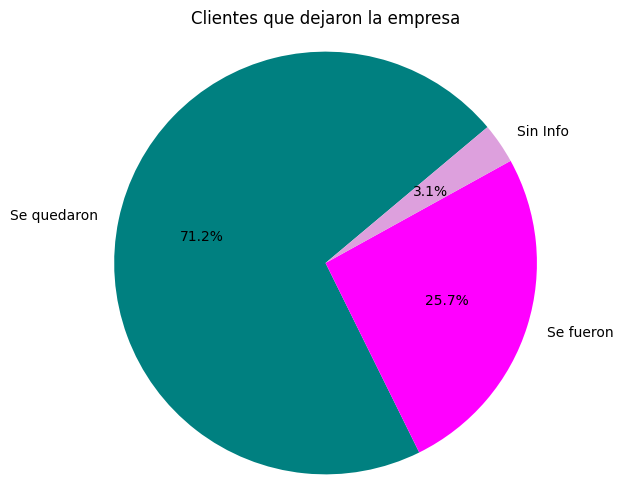

In [22]:
labels = ['Se quedaron', 'Se fueron', 'Sin Info']
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=40, colors=['teal', 'magenta', 'plum'])
plt.title('Clientes que dejaron la empresa')
plt.axis('equal')
plt.show()

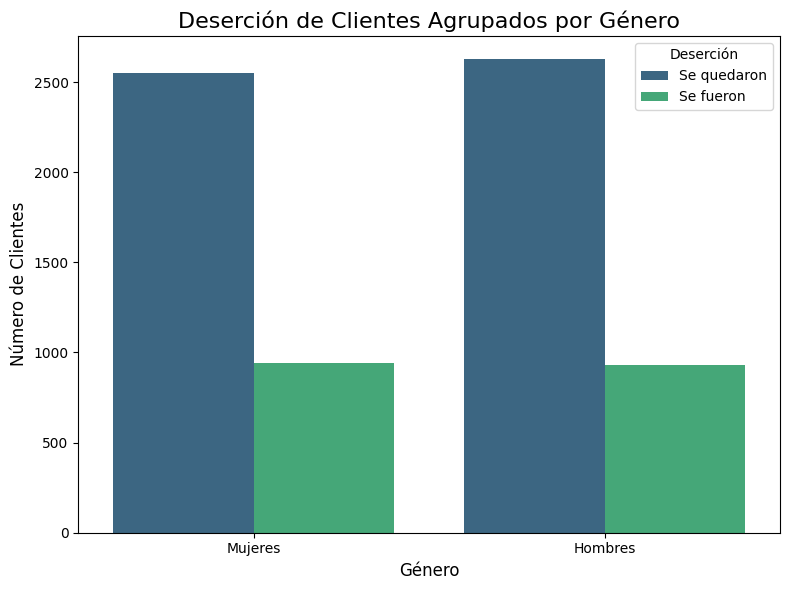

In [23]:
df_filtered = df[df['Churn'].isin([0, 1])].copy()
df_filtered['Churn_Label'] = df_filtered['Churn'].map({0: 'Se quedaron', 1: 'Se fueron'})
plt.figure(figsize=(8, 6))
sns.countplot(data=df_filtered, x='gender', hue='Churn_Label', palette='viridis')
current_labels = df_filtered['gender'].unique()
new_labels_map = {'Male': 'Hombres', 'Female': 'Mujeres'}
new_labels = [new_labels_map[label] for label in current_labels]
plt.xticks(ticks=range(len(new_labels)), labels=new_labels)
plt.title('Deserción de Clientes Agrupados por Género', fontsize=16)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.legend(title='Deserción')
plt.tight_layout()
plt.show()


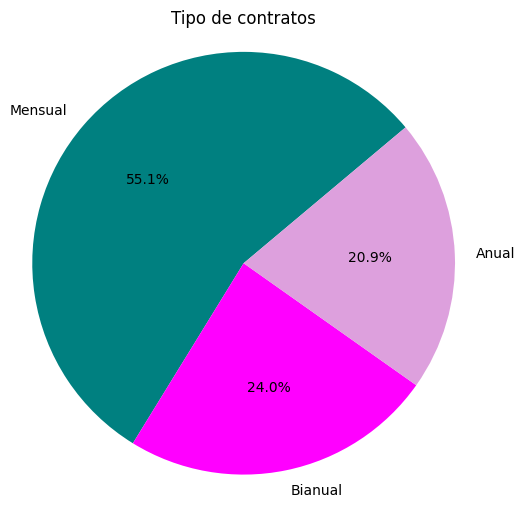

In [24]:
Contract_counts = df['Contract'].value_counts()
labels2 = ['Mensual', 'Bianual', 'Anual']
plt.figure(figsize=(6, 6))
plt.pie(Contract_counts, labels=labels2, autopct='%1.1f%%', startangle=40, colors=['teal', 'magenta', 'plum'])
plt.title('Tipo de contratos')
plt.axis('equal')
plt.show()

/tmp/ipython-input-51-1014574654.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='Churn_Label', y='Charges.Total', palette='viridis')


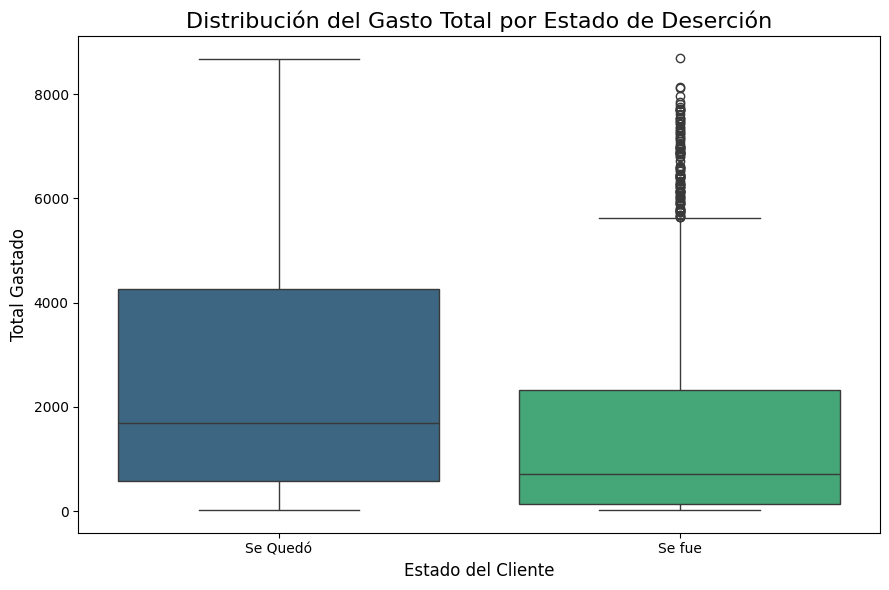

In [51]:
df_filtered = df[df['Churn'] != -1].copy()
df_filtered.dropna(subset=['Charges.Total'], inplace=True)

df_filtered['Churn_Label'] = df_filtered['Churn'].map({
    0: 'Se Quedó',
    1: 'Se fue'
})

plt.figure(figsize=(9, 6))
sns.boxplot(data=df_filtered, x='Churn_Label', y='Charges.Total', palette='viridis')

plt.title('Distribución del Gasto Total por Estado de Deserción', fontsize=16)
plt.xlabel('Estado del Cliente', fontsize=12)
plt.ylabel('Total Gastado', fontsize=12)

plt.tight_layout()
plt.show()

/tmp/ipython-input-55-1999145424.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered2, x='Churn_Label', y='tenure', palette='viridis') # Cambié la paleta a 'mako' para variar


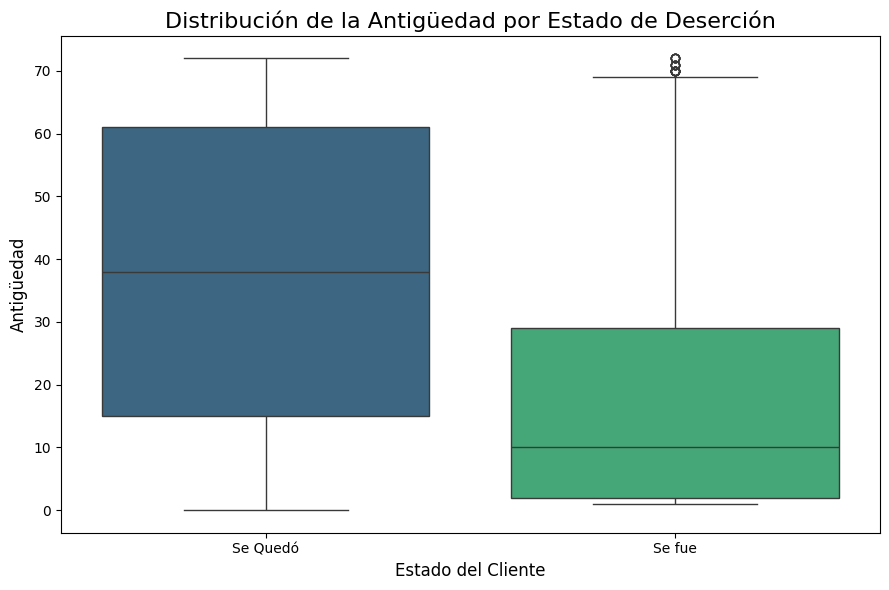

In [55]:
df_filtered2 = df[df['Churn'] != -1].copy()
df_filtered2.dropna(subset=['tenure'], inplace=True)

# Mapeamos los valores numéricos de 'Churn' a etiquetas descriptivas para el eje X.
df_filtered2['Churn_Label'] = df_filtered2['Churn'].map({
    0: 'Se Quedó',
    1: 'Se fue'
})

# --- Creación del Gráfico de Cajas para 'Tenure' ---
plt.figure(figsize=(9, 6))
# Usamos 'Churn_Label' en el eje X para las etiquetas descriptivas
# y 'Tenure' en el eje Y para la distribución de la antigüedad.
sns.boxplot(data=df_filtered2, x='Churn_Label', y='tenure', palette='viridis') # Cambié la paleta a 'mako' para variar

plt.title('Distribución de la Antigüedad por Estado de Deserción', fontsize=16)
plt.xlabel('Estado del Cliente', fontsize=12)
plt.ylabel('Antigüedad', fontsize=12) # Etiqueta del eje Y ajustada para 'Tenure'

plt.tight_layout()
plt.show()

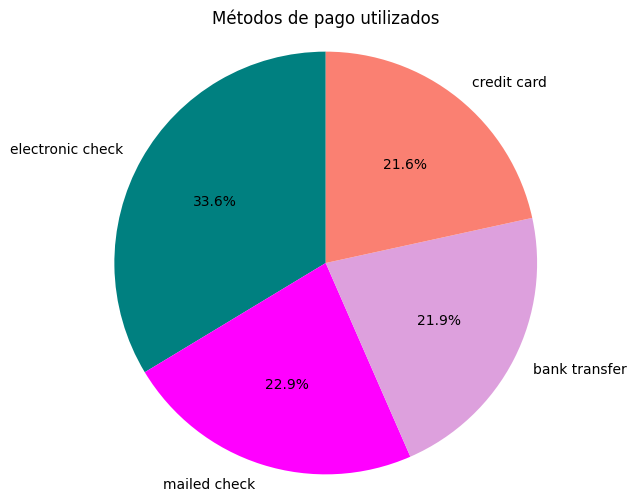

In [25]:
PaymentMethod_counts = df['PaymentMethod'].value_counts()
labels3 = ['electronic check', 'mailed check', 'bank transfer', 'credit card']
plt.figure(figsize=(6, 6))
plt.pie(PaymentMethod_counts, labels=labels3, autopct='%1.1f%%', startangle=90, colors=['teal', 'magenta', 'plum', 'salmon'])
plt.title('Métodos de pago utilizados')
plt.axis('equal')
plt.show()

--- Matriz de Correlación Numérica ---
Este es el coeficiente de correlación entre 'Churn' y 'Daily_Cost':

               Churn  Daily_Cost
Churn       1.000000    0.193412
Daily_Cost  0.193412    1.000000


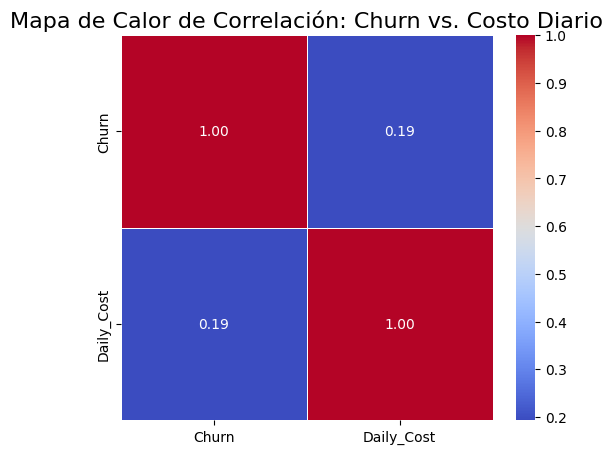


--- Interpretación ---
El coeficiente de correlación entre 'Churn' y 'Daily_Cost' es: 0.19
Esto indica una correlación débil o moderada. Existe una relación lineal limitada entre el costo diario y la deserción.

La visualización del mapa de calor complementa esto mostrando la fuerza de la relación con colores.


In [57]:
# --- Pasos para demostrar la correlación ---

# 1. Preparar los datos para la correlación
# Filtramos 'Churn' para solo 0 y 1, y eliminamos NaN en 'Daily_Cost'
df_filtered_corr = df[df['Churn'].isin([0, 1])].copy()
df_filtered_corr.dropna(subset=['Daily_Cost'], inplace=True)

# 2. Calcular la matriz de correlación (demostración numérica)
# Seleccionamos solo las columnas de interés y aplicamos .corr()
correlation_matrix = df_filtered_corr[['Churn', 'Daily_Cost']].corr()

print("--- Matriz de Correlación Numérica ---")
print("Este es el coeficiente de correlación entre 'Churn' y 'Daily_Cost':\n")
print(correlation_matrix)

# 3. Visualizar la correlación con un mapa de calor (demostración visual)
plt.figure(figsize=(6, 5)) # Tamaño del gráfico

sns.heatmap(
    correlation_matrix,
    annot=True,       # Muestra los valores de correlación en las celdas
    cmap='coolwarm',  # Paleta de colores: 'coolwarm' es buena para visualizar correlaciones
    fmt=".2f",        # Formato de los números a 2 decimales
    linewidths=.5,    # Líneas entre las celdas para mejor separación
    cbar=True         # Muestra la barra de color lateral para la escala
)

plt.title('Mapa de Calor de Correlación: Churn vs. Costo Diario', fontsize=16)
plt.show()

# --- Interpretación de la correlación (demostración de conclusiones) ---
correlation_value = correlation_matrix.loc['Churn', 'Daily_Cost']
print(f"\n--- Interpretación ---")
print(f"El coeficiente de correlación entre 'Churn' y 'Daily_Cost' es: {correlation_value:.2f}")

if correlation_value > 0.5:
    print("Esto indica una fuerte correlación positiva. A medida que el costo diario aumenta, la probabilidad de que un cliente deje la empresa tiende a aumentar.")
elif correlation_value < -0.5:
    print("Esto indica una fuerte correlación negativa. A medida que el costo diario aumenta, la probabilidad de que un cliente deje la empresa tiende a disminuir.")
elif correlation_value >= -0.5 and correlation_value <= 0.5 and correlation_value != 0:
    print("Esto indica una correlación débil o moderada. Existe una relación lineal limitada entre el costo diario y la deserción.")
elif correlation_value == 0:
    print("Esto indica que no hay una correlación lineal aparente entre el costo diario y la deserción.")

print("\nLa visualización del mapa de calor complementa esto mostrando la fuerza de la relación con colores.")

#📄Informe final

#1.- Introducción:
Se dispuso de un data set, el cual contiene datos referentes a la deserción de clientes en relación a multiples factores tales como: cantidad de servicios contratados, edad, género, duracion del servicio, etc.

#2.- Hallazgos

*   el 71% de los clientes se mantiene con el servicio, mientras que el 25% lo ha dejado
*   No hay diferencia entre la deserción de hombres y mujeres
*   A mayor dinero desembolsado mayor es la permanencia del cliente con ls servicios
*   El 55% de los clientes prefieren los contrados mensuales, seguidos porlos contratos bianuales
*   A mayor antiguedad  del cliente, mayor es el indice de permanencia
*   El metodo de pago preferido es a través de mail

#3.-Conclusión
Finalmente, existen diversos afactores que influyen en la retención de los clientes siendo de los mas fuertes la antiguadad de las cuentas y la ccantidad de dinero desembolsado a lo largo del tienpo.





